# Pretrage grafova

1. Definisanje grafa
2. Slepe pretrage
3. Rekonstruisanje putanje

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

# Zadatak 1

Definisati graf čiji čvorovi predstavljaju gradove a grane postojeće puteve između gradova. Iscrtati definisani graf.

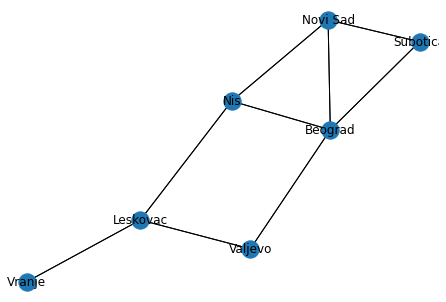

In [2]:
graf = {
    "Beograd": ["Novi Sad", "Nis", "Subotica", "Valjevo"],
    "Novi Sad": ["Beograd", "Subotica", "Nis"],
    "Subotica": ["Beograd", "Novi Sad"],
    "Nis": ["Beograd", "Novi Sad", "Leskovac"],
    "Valjevo": ["Beograd", "Leskovac"],
    "Leskovac": ["Valjevo", "Nis", "Vranje"],
    "Vranje": ["Leskovac"]
}

nx_graf = nx.from_dict_of_lists(graf, create_using=nx.DiGraph)
layout = nx.spring_layout(nx_graf)
nx.draw(nx_graf, pos=layout, with_labels=True, arrows=False)

# Zadatak 2

Napisati funkciju bfs koja vrši pretragu prvi u širinu.

In [3]:
def bfs(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [pocetni_cvor]
    poseceni = set(za_pretragu)
    while len(za_pretragu) > 0:
        trenutni = za_pretragu.pop(0)
        if trenutni == ciljni_cvor:
            return trenutni
        for cvor in graf[trenutni]:
            if cvor not in poseceni:
                za_pretragu.append(cvor)
                poseceni.add(cvor)

rezultat = bfs(graf, "Leskovac", "Subotica")
print(rezultat)

Subotica


# Zadatak 3

Prepraviti rešenje prethodnog zadatka tako da se kao rezultat dobija rekonstruisana putanja do pronađenog čvora ili None ukoliko je pretraga neuspešna.

[[None, 'Vranje'], ['Vranje', 'Leskovac'], ['Leskovac', 'Valjevo'], ['Valjevo', 'Beograd'], ['Beograd', 'Subotica']]


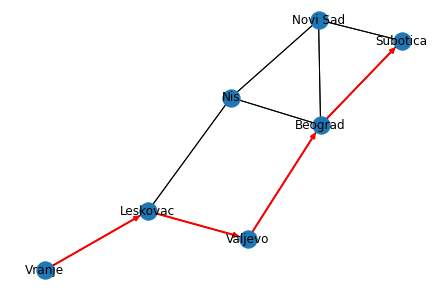

In [4]:
def rekonstruisi_putanju(istorija, zavrsni_cvor):
    trenutni = None
    for i in istorija:
        if i[1] == zavrsni_cvor:
            trenutni = i
    putanja = [trenutni]
    while trenutni[0] is not None:
        for i in istorija:
            if i[1] == trenutni[0]:
                trenutni = i
                putanja.insert(0, i)
    return putanja

def bfs(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [pocetni_cvor]
    poseceni = set(za_pretragu)
    istorija = [[None, pocetni_cvor]]
    while len(za_pretragu) > 0:
        trenutni = za_pretragu.pop(0)
        if trenutni == ciljni_cvor:
            return rekonstruisi_putanju(istorija, ciljni_cvor)
        for cvor in graf[trenutni]:
            if cvor not in poseceni:
                za_pretragu.append(cvor)
                poseceni.add(cvor)
                istorija.append([trenutni, cvor])
    return None

rezultat = bfs(graf, "Vranje", "Subotica")
print(rezultat)
nx.draw(nx_graf, pos=layout, with_labels=True, arrows=False)
nx.draw_networkx_edges(nx_graf, edgelist=rezultat[1:], pos=layout, edge_color='r', width=2)

# Zadatak 4

Napisati funkciju dfs koja radi pretragu prvi u dubinu i vraća putanju do pronađenog cilja ili None u slučaju da cilj nije pronađen.

[[None, 'Vranje'], ['Vranje', 'Leskovac'], ['Leskovac', 'Valjevo'], ['Valjevo', 'Beograd'], ['Beograd', 'Novi Sad'], ['Novi Sad', 'Nis']]


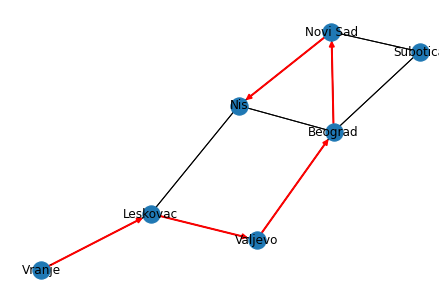

In [5]:
def dfs(graf, pocetni_cvor, ciljni_cvor):
    za_pretragu = [pocetni_cvor]
    poseceni = set(za_pretragu)
    istorija = [[None, pocetni_cvor]]
    trenutni = None
    while len(za_pretragu) > 0:
        trenutni = za_pretragu.pop()
        poseceni.add(trenutni)
        if trenutni == ciljni_cvor:
            return rekonstruisi_putanju(istorija, ciljni_cvor)
        for cvor in reversed(graf[trenutni]):
            if cvor not in poseceni:
                za_pretragu.append(cvor)
                istorija.append([trenutni, cvor])
    return None

rezultat = dfs(graf, "Vranje", "Nis")
print(rezultat)
nx.draw(nx_graf, pos=layout, with_labels=True, arrows=False)
nx.draw_networkx_edges(nx_graf, edgelist=rezultat[1:], pos=layout, edge_color='r', width=2)